In [1]:
import os
dir='D:\Data Science\Ambee'
os.chdir(dir)

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [3]:
city=pd.read_csv('city_attributes.csv')
humidity=pd.read_csv('humidity.csv')
pressure=pd.read_csv('pressure.csv')
temp=pd.read_csv('humidity.csv')
descrip=pd.read_csv('weather_description.csv')
winddir=pd.read_csv('wind_direction.csv')
windspeed=pd.read_csv('wind_speed.csv')

In [4]:
humidity.shape

(45253, 37)

In [5]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [6]:
humidity.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,43427.000000,44804.000000,44311.000000,44964.000000,45101.000000,44909.000000,44411.000000,43945.000000,44543.000000,43445.000000,...,44629.000000,43629.000000,43557.000000,44804.000000,44394.000000,44140.000000,44283.000000,44435.000000,44436.000000,44347.000000
mean,81.895480,74.697616,76.875042,77.159038,62.773841,67.784809,31.937831,37.484424,45.186157,53.022557,...,68.017769,66.642417,71.861538,77.375301,70.604857,66.861509,53.155184,79.800383,78.606760,68.732293
std,14.522221,19.042656,17.396016,18.147464,21.818042,19.419307,20.041855,21.662728,23.336546,23.905392,...,18.790524,19.874727,16.825027,18.750190,21.321606,16.464177,27.305008,23.051692,23.682244,19.273881
min,12.000000,10.000000,6.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,10.000000,7.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,73.000000,63.000000,68.000000,66.000000,48.000000,56.000000,16.000000,21.000000,26.000000,33.000000,...,54.000000,51.000000,60.000000,65.000000,54.000000,58.000000,31.000000,63.000000,61.000000,56.000000
50%,86.000000,80.000000,81.000000,81.000000,66.000000,71.000000,27.000000,32.000000,42.000000,52.000000,...,68.000000,68.000000,74.000000,81.000000,77.000000,69.000000,48.000000,89.000000,87.000000,70.000000
75%,93.000000,90.000000,89.000000,93.000000,81.000000,82.000000,43.000000,50.000000,63.000000,73.000000,...,84.000000,83.000000,86.000000,93.000000,88.000000,78.000000,75.000000,100.000000,100.000000,83.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
#Combined dataset of city Vancouver:
vancouver=(humidity[['datetime','Vancouver']].merge(temp[['datetime','Vancouver']],on='datetime').merge(pressure[['datetime','Vancouver']], on='datetime').merge(windspeed[['datetime','Vancouver']], on='datetime').merge(winddir[['datetime','Vancouver']], on='datetime').merge(descrip[['datetime','Vancouver']], on='datetime'))

In [8]:
#Weather data of city Vancouver:
vancouver.columns=['datetime','humidity','temperature','pressure','windspeed','winddirection','description']
vancouver.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,76.0,NaN,0.0,0.0,mist
2,2012-10-01 14:00:00,76.0,76.0,NaN,0.0,6.0,broken clouds
3,2012-10-01 15:00:00,76.0,76.0,NaN,0.0,20.0,broken clouds
4,2012-10-01 16:00:00,77.0,77.0,NaN,0.0,34.0,broken clouds


In [9]:
vancouver.shape

(45253, 7)

In [10]:
vancouver.describe()

,humidity,temperature,pressure,windspeed,winddirection
count,43427.000000,43427.000000,41019.000000,44458.000000,44458.000000
mean,81.895480,81.895480,1018.130915,2.432746,159.892978
std,14.522221,14.522221,15.792425,2.004636,98.163221
min,12.000000,12.000000,807.000000,0.000000,0.000000
25%,73.000000,73.000000,1012.000000,1.000000,80.000000
50%,86.000000,86.000000,1017.000000,2.000000,140.000000
75%,93.000000,93.000000,1022.000000,4.000000,236.000000
max,100.000000,100.000000,1100.000000,25.000000,360.000000


In [11]:
vancouver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
datetime         45253 non-null object
humidity         43427 non-null float64
temperature      43427 non-null float64
pressure         41019 non-null float64
windspeed        44458 non-null float64
winddirection    44458 non-null float64
description      44460 non-null object
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [12]:
import datetime
vancouver['datetime']=pd.to_datetime(vancouver['datetime'])
vancouver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
datetime         45253 non-null datetime64[ns]
humidity         43427 non-null float64
temperature      43427 non-null float64
pressure         41019 non-null float64
windspeed        44458 non-null float64
winddirection    44458 non-null float64
description      44460 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.8+ MB


In [13]:
vancouver.isnull().sum()

datetime            0
humidity         1826
temperature      1826
pressure         4234
windspeed         795
winddirection     795
description       793
dtype: int64

In [14]:
vancouver['humidity']=vancouver['humidity'].fillna(method='bfill')
vancouver['temperature']=vancouver['temperature'].fillna(method='bfill')
vancouver['pressure']=vancouver['pressure'].fillna(method='bfill')
vancouver['windspeed']=vancouver['windspeed'].fillna(method='bfill')
vancouver['winddirection']=vancouver['winddirection'].fillna(method='bfill')
vancouver['description']=vancouver['description'].fillna(method='bfill')

In [15]:
vancouver.isnull().sum()

datetime           0
humidity         792
temperature      792
pressure         792
windspeed        792
winddirection    792
description      792
dtype: int64

In [16]:
vancouver['humidity']=vancouver['humidity'].fillna(method='ffill')
vancouver['temperature']=vancouver['temperature'].fillna(method='ffill')
vancouver['pressure']=vancouver['pressure'].fillna(method='ffill')
vancouver['windspeed']=vancouver['windspeed'].fillna(method='ffill')
vancouver['winddirection']=vancouver['winddirection'].fillna(method='ffill')
vancouver['description']=vancouver['description'].fillna(method='ffill')

In [17]:
vancouver.isnull().sum()

datetime         0
humidity         0
temperature      0
pressure         0
windspeed        0
winddirection    0
description      0
dtype: int64

In [18]:
vancouver.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,76.0,76.0,807.0,0.0,0.0,mist
1,2012-10-01 13:00:00,76.0,76.0,807.0,0.0,0.0,mist
2,2012-10-01 14:00:00,76.0,76.0,807.0,0.0,6.0,broken clouds
3,2012-10-01 15:00:00,76.0,76.0,807.0,0.0,20.0,broken clouds
4,2012-10-01 16:00:00,77.0,77.0,807.0,0.0,34.0,broken clouds


In [19]:
vancouver.describe()

,humidity,temperature,pressure,windspeed,winddirection
count,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,81.908470,81.908470,1018.677944,2.460168,162.170508
std,14.569022,14.569022,17.455863,1.997598,98.787752
min,12.000000,12.000000,807.000000,0.000000,0.000000
25%,73.000000,73.000000,1012.000000,1.000000,81.000000
50%,86.000000,86.000000,1017.000000,2.000000,148.000000
75%,93.000000,93.000000,1023.000000,4.000000,243.000000
max,100.000000,100.000000,1100.000000,25.000000,360.000000


In [20]:
vancouver['datetime'].head()

0   2012-10-01 12:00:00
1   2012-10-01 13:00:00
2   2012-10-01 14:00:00
3   2012-10-01 15:00:00
4   2012-10-01 16:00:00
Name: datetime, dtype: datetime64[ns]

In [21]:
time=pd.DatetimeIndex(vancouver['datetime'])
vancouver['date']=time.date
vancouver['year']=time.year
vancouver['month']=time.month
vancouver['day']=time.day
vancouver['time']=time.time

In [22]:
vancouver.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description,date,year,month,day,time
0,2012-10-01 12:00:00,76.0,76.0,807.0,0.0,0.0,mist,2012-10-01,2012,10,1,12:00:00
1,2012-10-01 13:00:00,76.0,76.0,807.0,0.0,0.0,mist,2012-10-01,2012,10,1,13:00:00
2,2012-10-01 14:00:00,76.0,76.0,807.0,0.0,6.0,broken clouds,2012-10-01,2012,10,1,14:00:00
3,2012-10-01 15:00:00,76.0,76.0,807.0,0.0,20.0,broken clouds,2012-10-01,2012,10,1,15:00:00
4,2012-10-01 16:00:00,77.0,77.0,807.0,0.0,34.0,broken clouds,2012-10-01,2012,10,1,16:00:00


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\TINU ROHITH\Anaconda3\lib\site-pack

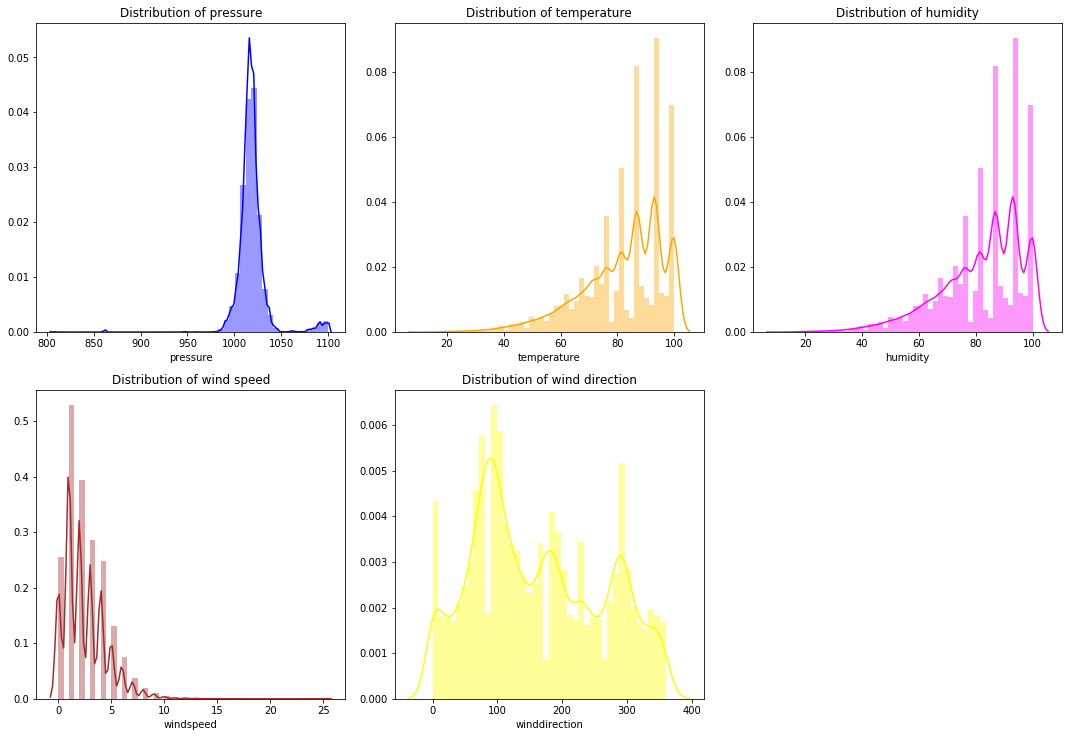

In [24]:
#Visualization to check the distribution of the attributes:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(vancouver['pressure'],color='blue')
plt.title('Distribution of pressure')
plt.subplot(3,3,2)
sns.distplot(vancouver['temperature'],color='orange')
plt.title('Distribution of temperature')
plt.subplot(3,3,3)
sns.distplot(vancouver['humidity'],color='magenta')
plt.title('Distribution of humidity')
plt.subplot(3,3,4)
sns.distplot(vancouver['windspeed'],color='brown')
plt.title('Distribution of wind speed')
plt.subplot(3,3,5)
sns.distplot(vancouver['winddirection'],color='yellow')
plt.title('Distribution of wind direction')
plt.tight_layout()
plt.show()

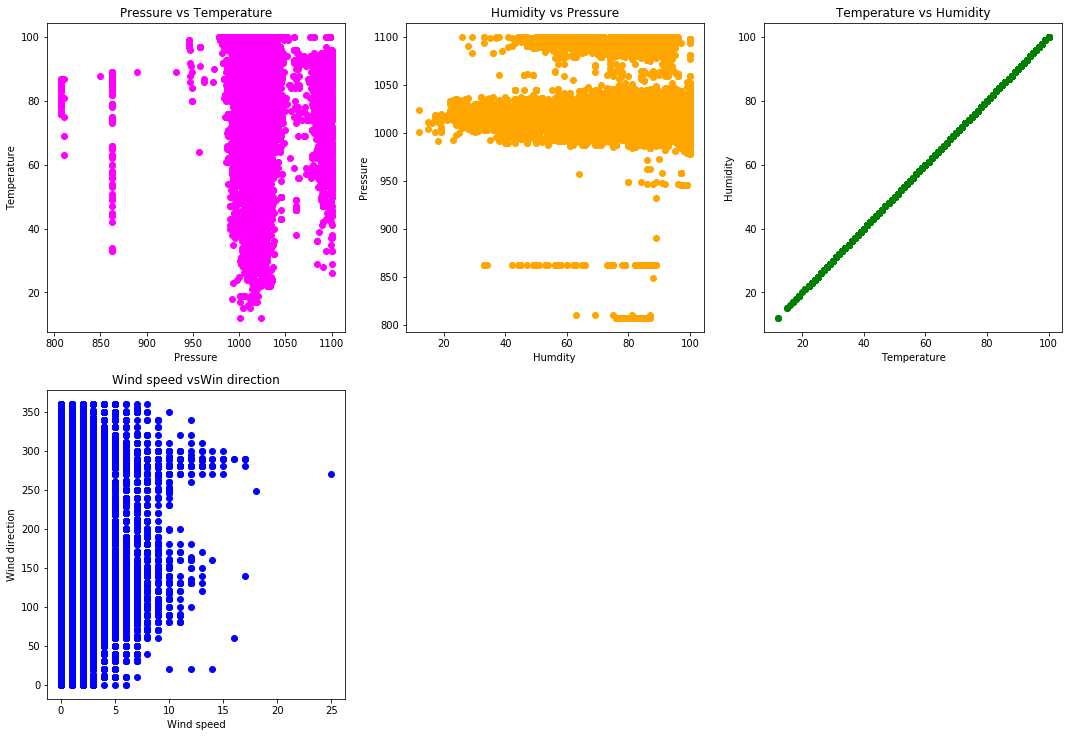

In [25]:
#Distribution of values across each factors:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.scatter(x=vancouver['pressure'],y=vancouver['temperature'],color='magenta')
plt.title('Pressure vs Temperature')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.subplot(3,3,2)
plt.scatter(x=vancouver['humidity'],y=vancouver['pressure'],color='orange')
plt.title('Humidity vs Pressure')
plt.xlabel('Humdity')
plt.ylabel('Pressure')
plt.subplot(3,3,3)
plt.scatter(x=vancouver['temperature'],y=vancouver['humidity'],color='green')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.subplot(3,3,4)
plt.scatter(x=vancouver['windspeed'],y=vancouver['winddirection'],color='blue')
plt.title('Wind speed vsWin direction')
plt.xlabel('Wind speed')
plt.ylabel('Wind direction')
plt.tight_layout()
plt.show()

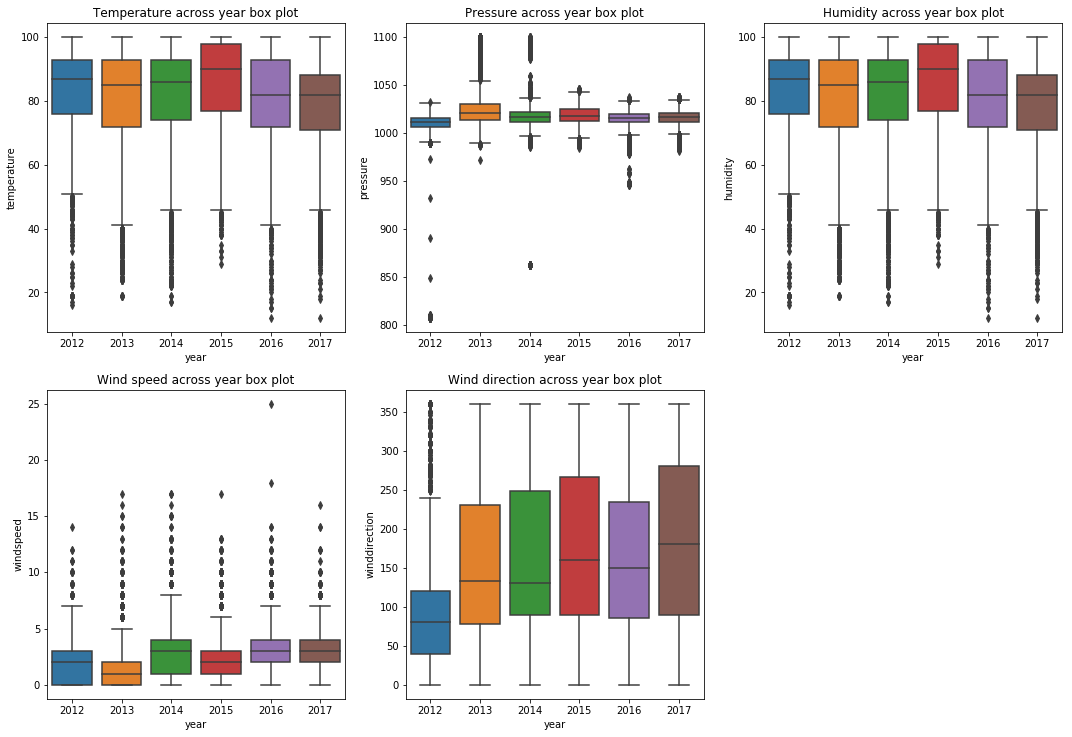

In [26]:
#Boxplot of each attributes across year:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='year',y='temperature',data=vancouver)
plt.title('Temperature across year box plot')
plt.subplot(3,3,2)
sns.boxplot(x='year',y='pressure',data=vancouver)
plt.title('Pressure across year box plot')
plt.subplot(3,3,3)
sns.boxplot(x='year',y='humidity',data=vancouver)
plt.title('Humidity across year box plot')
plt.subplot(3,3,4)
sns.boxplot(x='year',y='windspeed',data=vancouver)
plt.title('Wind speed across year box plot')
plt.subplot(3,3,5)
sns.boxplot(x='year',y='winddirection',data=vancouver)
plt.title('Wind direction across year box plot')
plt.tight_layout()
plt.show()

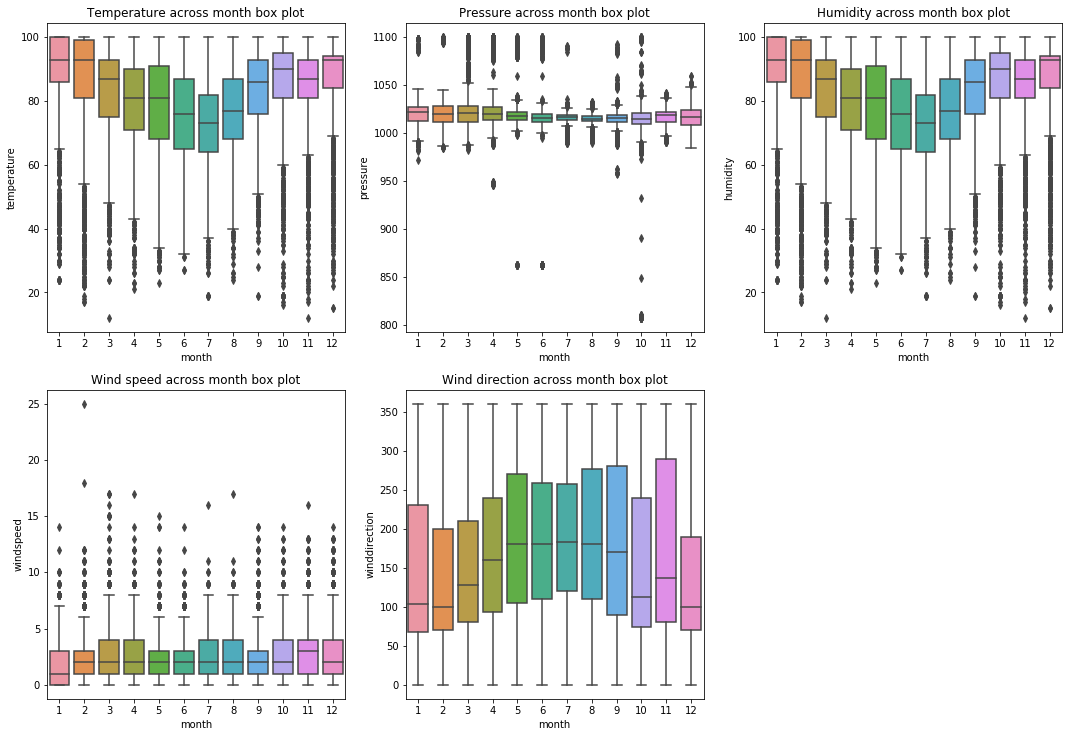

In [27]:
#Boxplot of each attributes across month:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='month',y='temperature',data=vancouver)
plt.title('Temperature across month box plot')
plt.subplot(3,3,2)
sns.boxplot(x='month',y='pressure',data=vancouver)
plt.title('Pressure across month box plot')
plt.subplot(3,3,3)
sns.boxplot(x='month',y='humidity',data=vancouver)
plt.title('Humidity across month box plot')
plt.subplot(3,3,4)
sns.boxplot(x='month',y='windspeed',data=vancouver)
plt.title('Wind speed across month box plot')
plt.subplot(3,3,5)
sns.boxplot(x='month',y='winddirection',data=vancouver)
plt.title('Wind direction across month box plot')
plt.tight_layout()
plt.show()

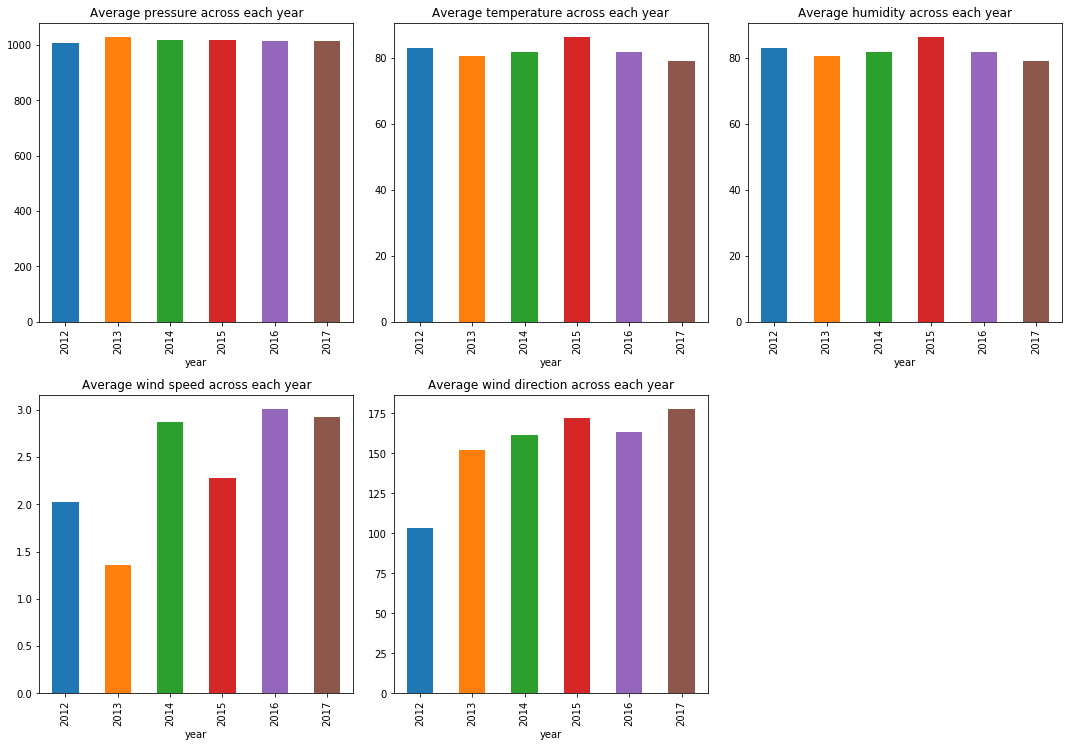

In [28]:
#Visualization of climatic attributes across each year:
from matplotlib import style
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
vancouver.groupby('year')['pressure'].mean().plot(kind='bar')
plt.title("Average pressure across each year")
plt.subplot(3,3,2)
vancouver.groupby('year')['temperature'].mean().plot(kind='bar')
plt.title("Average temperature across each year")
plt.subplot(3,3,3)
vancouver.groupby('year')['humidity'].mean().plot(kind='bar')
plt.title("Average humidity across each year")
plt.subplot(3,3,4)
vancouver.groupby('year')['windspeed'].mean().plot(kind='bar')
plt.title("Average wind speed across each year")
plt.subplot(3,3,5)
vancouver.groupby('year')['winddirection'].mean().plot(kind='bar')
plt.title("Average wind direction across each year")
plt.tight_layout()
style.use('classic')
plt.show()

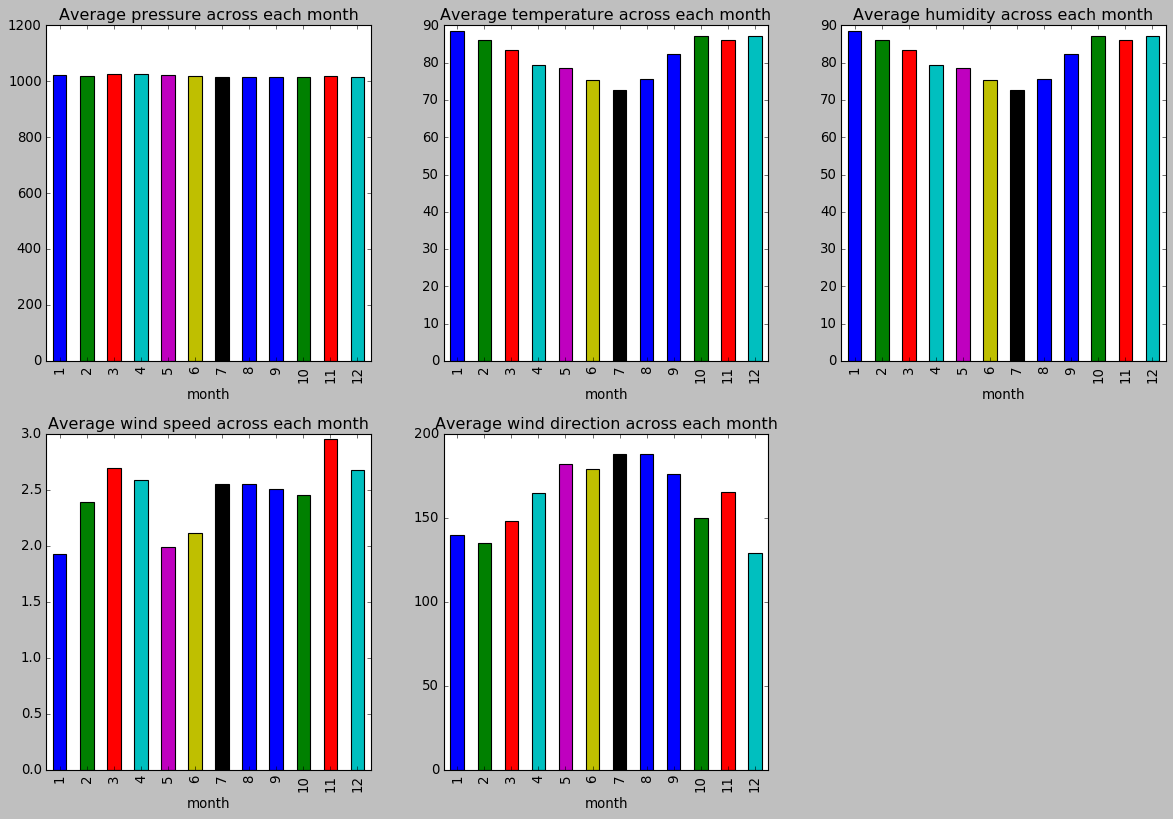

In [29]:
#Visualization of climatic attributes across each month:
from matplotlib import style
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
vancouver.groupby('month')['pressure'].mean().plot(kind='bar')
plt.title("Average pressure across each month")
plt.subplot(3,3,2)
vancouver.groupby('month')['temperature'].mean().plot(kind='bar')
plt.title("Average temperature across each month")
plt.subplot(3,3,3)
vancouver.groupby('month')['humidity'].mean().plot(kind='bar')
plt.title("Average humidity across each month")
plt.subplot(3,3,4)
vancouver.groupby('month')['windspeed'].mean().plot(kind='bar')
plt.title("Average wind speed across each month")
plt.subplot(3,3,5)
vancouver.groupby('month')['winddirection'].mean().plot(kind='bar')
plt.title("Average wind direction across each month")
plt.tight_layout()
style.use('classic')
plt.show()

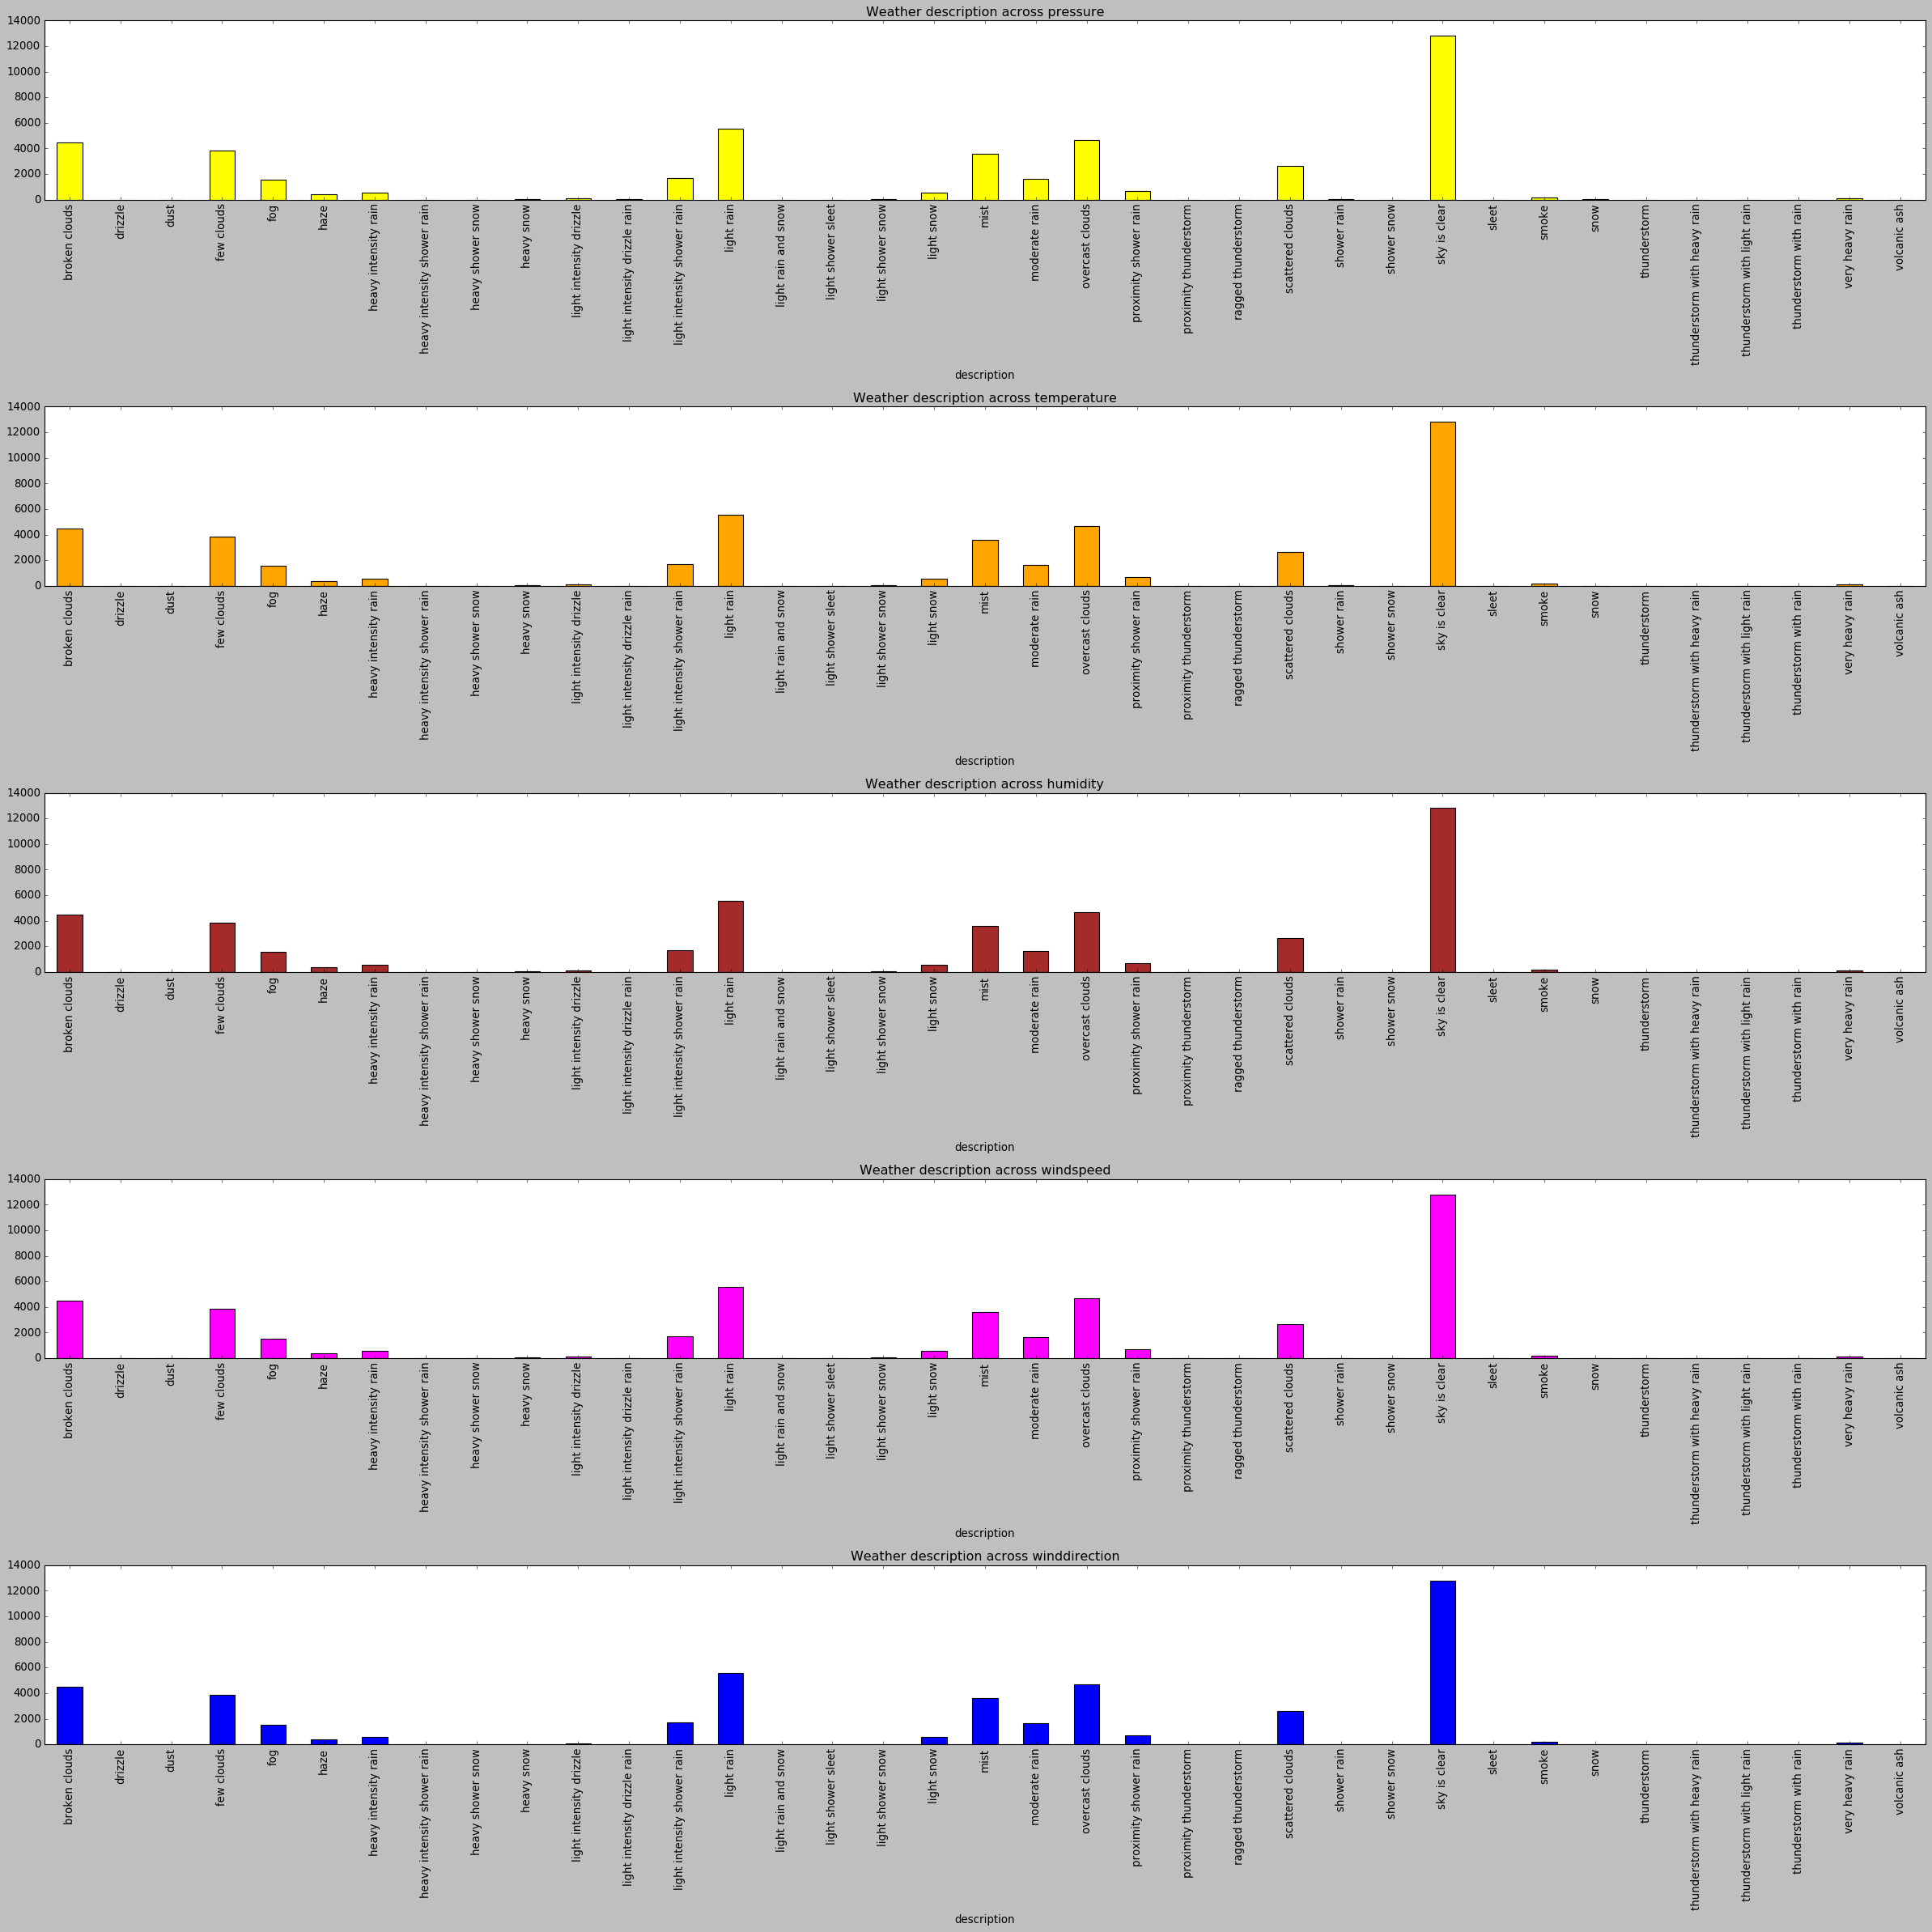

In [30]:
#Visualization of weather description acros each climatic attributes:
plt.figure(figsize=(30,30))
plt.subplot(5,1,1)
vancouver.groupby('description').count()['pressure'].plot(kind='bar',color='yellow')
plt.title("Weather description across pressure")
plt.subplot(5,1,2)
vancouver.groupby('description').count()['temperature'].plot(kind='bar',color='orange')
plt.title("Weather description across temperature")
plt.subplot(5,1,3)
vancouver.groupby('description').count()['humidity'].plot(kind='bar',color='brown')
plt.title("Weather description across humidity")
plt.subplot(5,1,4)
vancouver.groupby('description').count()['windspeed'].plot(kind='bar',color='magenta')
plt.title("Weather description across windspeed")
plt.subplot(5,1,5)
vancouver.groupby('description').count()['winddirection'].plot(kind='bar',color='blue')
plt.title("Weather description across winddirection")
plt.tight_layout()

In [31]:
#Correlation across each factors:
vancouver.corr()

,humidity,temperature,pressure,windspeed,winddirection,year,month,day
humidity,1.000000,1.000000,-0.012188,-0.090747,-0.164222,-0.023701,0.025209,0.053089
temperature,1.000000,1.000000,-0.012188,-0.090747,-0.164222,-0.023701,0.025209,0.053089
pressure,-0.012188,-0.012188,1.000000,-0.220625,-0.001381,-0.141736,-0.166270,0.031277
windspeed,-0.090747,-0.090747,-0.220625,1.000000,0.106379,0.226222,0.083541,-0.009441
winddirection,-0.164222,-0.164222,-0.001381,0.106379,1.000000,0.123217,0.026105,0.004535
year,-0.023701,-0.023701,-0.141736,0.226222,0.123217,1.000000,-0.156412,-0.003361
month,0.025209,0.025209,-0.166270,0.083541,0.026105,-0.156412,1.000000,0.009781
day,0.053089,0.053089,0.031277,-0.009441,0.004535,-0.003361,0.009781,1.000000


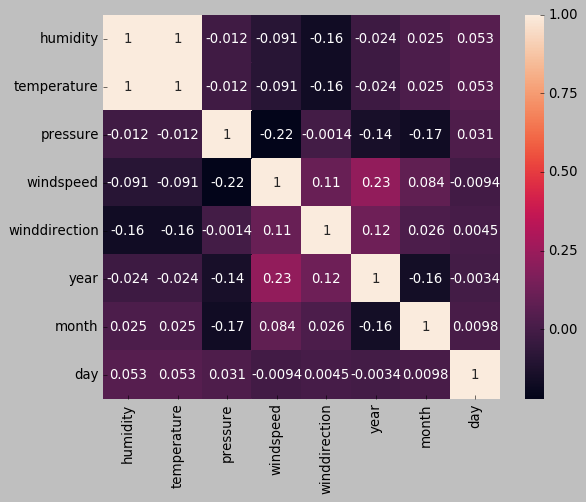

In [32]:
#Heat map to visualize correlation:
sns.heatmap(vancouver.corr(),annot=True)

In [33]:
data=pd.DataFrame()
data['avghumidity']=vancouver.groupby('date')['humidity'].mean()
data['maxhumidity']=vancouver.groupby('date')['humidity'].max()
data['minhumidity']=vancouver.groupby('date')['humidity'].min()
data['avgtemp']=vancouver.groupby('date')['temperature'].mean()
data['maxtemp']=vancouver.groupby('date')['temperature'].max()
data['mintemp']=vancouver.groupby('date')['temperature'].min()
data['avgpressure']=vancouver.groupby('date')['pressure'].mean()
data['maxpressure']=vancouver.groupby('date')['pressure'].max()
data['minpressure']=vancouver.groupby('date')['pressure'].min()
data['avgwindspeed']=vancouver.groupby('date')['windspeed'].mean()
data['maxwindspeed']=vancouver.groupby('date')['windspeed'].max()
data['minwindspeed']=vancouver.groupby('date')['windspeed'].min()
data['avgwinddiection']=vancouver.groupby('date')['winddirection'].mean()
data['maxwinddirection']=vancouver.groupby('date')['winddirection'].max()
data['minwindirection']=vancouver.groupby('date')['winddirection'].min()

In [34]:
data.reset_index(level=0,inplace=True)

In [35]:
t=pd.DatetimeIndex(data['date'])
data['date']=t.date
data['year']=t.year
data['month']=t.month
data['day']=t.day

In [36]:
#Summarised data of Vancouver city dataset:
data.head()

,date,avghumidity,maxhumidity,minhumidity,avgtemp,maxtemp,mintemp,avgpressure,maxpressure,minpressure,avgwindspeed,maxwindspeed,minwindspeed,avgwinddiection,maxwinddirection,minwindirection,year,month,day
0,2012-10-01,78.083333,81.0,76.0,78.083333,81.0,76.0,807.000000,807.0,807.0,0.000000,0.0,0.0,56.666667,130.0,0.0,2012,10,1
1,2012-10-02,77.375000,91.0,45.0,77.375000,91.0,45.0,910.500000,1027.0,807.0,0.000000,0.0,0.0,209.500000,346.0,45.0,2012,10,2
2,2012-10-03,71.625000,87.0,47.0,71.625000,87.0,47.0,1010.291667,1017.0,1008.0,0.541667,11.0,0.0,162.916667,337.0,0.0,2012,10,3
3,2012-10-04,48.875000,72.0,19.0,48.875000,72.0,19.0,1018.583333,1032.0,1015.0,0.625000,3.0,0.0,87.166667,274.0,0.0,2012,10,4
4,2012-10-05,41.375000,78.0,19.0,41.375000,78.0,19.0,1015.375000,1016.0,1015.0,0.416667,2.0,0.0,147.916667,360.0,0.0,2012,10,5


In [37]:
data.shape

(1887, 19)

In [38]:
data.describe()

,avghumidity,maxhumidity,minhumidity,avgtemp,maxtemp,mintemp,avgpressure,maxpressure,minpressure,avgwindspeed,maxwindspeed,minwindspeed,avgwinddiection,maxwinddirection,minwindirection,year,month,day
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,81.910042,94.660837,63.036566,81.910042,94.660837,63.036566,1018.623035,1027.098569,1009.008479,2.460299,5.222046,0.696343,162.207472,293.908320,41.927928,2014.821410,6.651828,15.728670
std,10.305340,6.397530,17.875682,10.305340,6.397530,17.875682,14.089269,21.748779,22.961929,1.395943,2.577738,0.884953,56.579573,69.651355,56.098800,1.509042,3.466263,8.801905
min,33.000000,48.000000,12.000000,33.000000,48.000000,12.000000,807.000000,807.000000,807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,75.145833,93.000000,50.000000,75.145833,93.000000,50.000000,1012.291667,1017.000000,1006.000000,1.416667,4.000000,0.000000,123.645833,260.000000,0.000000,2014.000000,4.000000,8.000000
50%,82.458333,96.000000,63.000000,82.458333,96.000000,63.000000,1017.375000,1021.000000,1012.000000,2.291667,5.000000,1.000000,157.416667,320.000000,20.000000,2015.000000,7.000000,16.000000
75%,89.666667,100.000000,76.000000,89.666667,100.000000,76.000000,1022.708333,1029.000000,1018.000000,3.375000,7.000000,1.000000,194.270833,350.000000,66.500000,2016.000000,10.000000,23.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1098.500000,1100.000000,1096.000000,11.125000,25.000000,5.000000,328.041667,360.000000,305.000000,2017.000000,12.000000,31.000000


In [39]:
vancouver['description'].describe()

count            45253
unique              37
top       sky is clear
freq             12805
Name: description, dtype: object

In [40]:
vancouver_new=vancouver.drop(['datetime','date','month','year','time'],axis=1)
vancouver_new.head()

,humidity,temperature,pressure,windspeed,winddirection,description,day
0,76.0,76.0,807.0,0.0,0.0,mist,1
1,76.0,76.0,807.0,0.0,0.0,mist,1
2,76.0,76.0,807.0,0.0,6.0,broken clouds,1
3,76.0,76.0,807.0,0.0,20.0,broken clouds,1
4,77.0,77.0,807.0,0.0,34.0,broken clouds,1


In [41]:
vancouver_new=pd.get_dummies(vancouver_new)

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
#Assuming target variable as temperature:
m=ARIMA(vancouver_new['temperature'], order=(4,1,0)) # lags=4, displacement=1, moving average = 0

In [44]:
mf=m.fit(disp=0) # disp=o, to overcome lag error

In [45]:
print (mf.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.temperature   No. Observations:                45252
Model:                 ARIMA(4, 1, 0)   Log Likelihood             -158830.738
Method:                       css-mle   S.D. of innovations              8.093
Date:                Sat, 06 Jul 2019   AIC                         317673.475
Time:                        13:47:11   BIC                         317725.795
Sample:                             1   HQIC                        317689.940
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0002      0.025      0.010      0.992      -0.049       0.049
ar.L1.D.temperature    -0.3142      0.005    -66.887      0.000      -0.323      -0.305
ar.L2.D.temperat

In [46]:
residual=DataFrame(mf.resid)

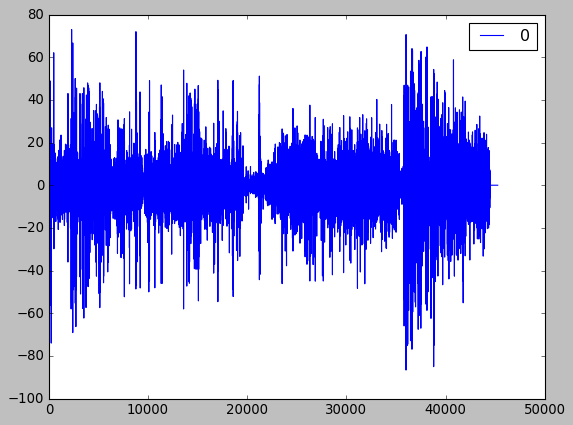

In [47]:
residual.plot()

In [51]:
#Predicting model for vancouver city weather data, assuming 'Temperature'  as target variable:
x=vancouver_new.drop(['temperature'],axis=1)
y=vancouver_new['temperature']
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.30,random_state=200)

In [52]:
import sklearn.tree as tree
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
reg=tree.DecisionTreeRegressor(random_state=200)
model=model_selection.GridSearchCV(reg,param_grid={'max_depth':[3,4,5,6,7]})

In [53]:
model.fit(x_train,y_train)

C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=200,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [3, 4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [55]:
model.best_score_

0.9999717983727914

In [56]:
#Found best estimator as 7:
reg=tree.DecisionTreeRegressor(max_depth=7)

In [57]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
reg.score(x_test,y_test)

0.9999734644666934

In [59]:
reg.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
#Important features influencing the target variable 'temperature:
pd.Series(reg.feature_importances_,index=x.columns).sort_values(ascending=False)

humidity                                    1.0
description_haze                            0.0
description_light rain                      0.0
description_light intensity shower rain     0.0
description_light intensity drizzle rain    0.0
description_light intensity drizzle         0.0
description_heavy snow                      0.0
description_heavy shower snow               0.0
description_heavy intensity shower rain     0.0
description_heavy intensity rain            0.0
description_fog                             0.0
description_very heavy rain                 0.0
description_few clouds                      0.0
description_dust                            0.0
description_drizzle                         0.0
description_broken clouds                   0.0
day                                         0.0
winddirection                               0.0
windspeed                                   0.0
pressure                                    0.0
description_light rain and snow         

In [61]:
x_test=preprocessing.normalize(x_test)
print (metrics.mean_squared_error(y_test,reg.predict(x_test)))

4604.431578602763


In [62]:
#Predicting model for vancouver city weather data, assuming 'Pressure'  as target variable:
x1=vancouver_new.drop(['pressure'],axis=1)
y1=vancouver_new['pressure']
x1_train,x1_test,y1_train,y1_test=model_selection.train_test_split(x1,y1,test_size=0.30,random_state=200)

In [63]:
reg=tree.DecisionTreeRegressor(random_state=200)
model1=model_selection.GridSearchCV(reg,param_grid={'max_depth':[3,4,5,6,7]})

In [64]:
model1.fit(x1_train,y1_train)
model1.best_estimator_

C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [65]:
model1.best_score_

0.09327607241701796

In [66]:
#Found best estimator as 5:
reg1=tree.DecisionTreeRegressor(max_depth=5)
reg1.fit(x1_train,y1_train)
reg1.score(x1_test,y1_test)

0.09547526164418474

In [67]:
reg1.feature_importances_

array([0.10714412, 0.03313197, 0.57786049, 0.06357247, 0.05833706,
       0.03873361, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00735926, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04577478, 0.        , 0.        , 0.        , 0.05652896,
       0.        , 0.        , 0.00775302, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00380426, 0.        ])

In [68]:
#Important features influencing the target variable 'pressure':
pd.Series(reg1.feature_importances_,index=x1.columns).sort_values(ascending=False)

windspeed                                   0.577860
humidity                                    0.107144
winddirection                               0.063572
day                                         0.058337
description_scattered clouds                0.056529
description_overcast clouds                 0.045775
description_broken clouds                   0.038734
temperature                                 0.033132
description_sky is clear                    0.007753
description_heavy intensity rain            0.007359
description_very heavy rain                 0.003804
description_light intensity drizzle rain    0.000000
description_light intensity drizzle         0.000000
description_heavy snow                      0.000000
description_heavy shower snow               0.000000
description_fog                             0.000000
description_heavy intensity shower rain     0.000000
description_haze                            0.000000
description_light rain                      0.

In [69]:
x1_test=preprocessing.normalize(x1_test)
print (metrics.mean_squared_error(y1_test,reg1.predict(x1_test)))

328.25228751472264


In [70]:
#Predicting model for vancouver city weather data, assuming 'windspeed'  as target variable:
x2=vancouver_new.drop(['windspeed'],axis=1)
y2=vancouver_new['windspeed']
x2_train,x2_test,y2_train,y2_test=model_selection.train_test_split(x2,y2,test_size=0.30,random_state=200)

In [71]:
reg=tree.DecisionTreeRegressor(random_state=200)
model2=model_selection.GridSearchCV(reg,param_grid={'max_depth':[3,4,5,6,7]})

In [72]:
model2.fit(x2_train,y2_train)
model2.best_estimator_

C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [73]:
#Found best estimator as 7:
reg2=tree.DecisionTreeRegressor(max_depth=7)
reg2.fit(x2_train,y2_train)
reg2.score(x2_test,y2_test)

0.26216558589295014

In [74]:
reg2.feature_importances_

array([8.01638566e-02, 2.40501348e-02, 3.22897877e-01, 4.21775989e-01,
       1.00800170e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.27099036e-05, 9.26270407e-05, 0.00000000e+00, 1.70146557e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.49010026e-03, 7.68783506e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.21546296e-03, 7.97229596e-04,
       8.85566196e-03, 3.35465831e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.89971657e-03, 0.00000000e+00, 0.00000000e+00,
       1.16164822e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [75]:
#Important features influencing the target variable 'wind speed':
pd.Series(reg2.feature_importances_,index=x2.columns).sort_values(ascending=False)

winddirection                               0.421776
pressure                                    0.322898
description_sky is clear                    0.116165
humidity                                    0.080164
temperature                                 0.024050
day                                         0.010080
description_scattered clouds                0.008900
description_moderate rain                   0.008856
description_light intensity shower rain     0.002490
description_heavy intensity rain            0.001701
description_light snow                      0.001215
description_mist                            0.000797
description_light rain                      0.000769
description_fog                             0.000093
description_overcast clouds                 0.000034
description_few clouds                      0.000013
description_heavy intensity shower rain     0.000000
description_dust                            0.000000
description_haze                            0.

In [76]:
reg2.predict(x2_test)

array([1.42857143, 2.04064516, 3.12050568, ..., 3.12050568, 2.1969697 ,
       3.12050568])

In [77]:
x2_test=preprocessing.normalize(x2_test)
print (metrics.mean_squared_error(y2_test,reg2.predict(x2_test)))

6.1616087212728345


In [78]:
data=data.drop(['date','month','year'],axis=1)
data.head()

,avghumidity,maxhumidity,minhumidity,avgtemp,maxtemp,mintemp,avgpressure,maxpressure,minpressure,avgwindspeed,maxwindspeed,minwindspeed,avgwinddiection,maxwinddirection,minwindirection,day
0,78.083333,81.0,76.0,78.083333,81.0,76.0,807.000000,807.0,807.0,0.000000,0.0,0.0,56.666667,130.0,0.0,1
1,77.375000,91.0,45.0,77.375000,91.0,45.0,910.500000,1027.0,807.0,0.000000,0.0,0.0,209.500000,346.0,45.0,2
2,71.625000,87.0,47.0,71.625000,87.0,47.0,1010.291667,1017.0,1008.0,0.541667,11.0,0.0,162.916667,337.0,0.0,3
3,48.875000,72.0,19.0,48.875000,72.0,19.0,1018.583333,1032.0,1015.0,0.625000,3.0,0.0,87.166667,274.0,0.0,4
4,41.375000,78.0,19.0,41.375000,78.0,19.0,1015.375000,1016.0,1015.0,0.416667,2.0,0.0,147.916667,360.0,0.0,5


In [79]:
#Predicting model for vancouver city summarised weather data, assuming ' Average Temperature'  as target variable:
x3=data.drop(['avgtemp'],axis=1)
y3=data['avgtemp']
x3_train,x3_test,y3_train,y3_test=model_selection.train_test_split(x3,y3,test_size=0.30,random_state=200)

In [80]:
reg=tree.DecisionTreeRegressor(random_state=200)
model3=model_selection.GridSearchCV(reg,param_grid={'max_depth':[3,4,5,6,7]})

In [81]:
model3.fit(x3_train,y3_train)
model3.best_estimator_

C:\Users\TINU ROHITH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=200, splitter='best')

In [82]:
#Found best estimator as 7:
reg3=tree.DecisionTreeRegressor(max_depth=7)
reg3.fit(x3_train,y3_train)
reg3.score(x3_test,y3_test)

0.9994352232606221

In [83]:
reg3.feature_importances_

array([9.99929961e-01, 0.00000000e+00, 7.55272184e-06, 0.00000000e+00,
       7.07857874e-06, 0.00000000e+00, 7.71007021e-06, 3.71111379e-05,
       8.94410104e-06, 1.41613534e-06, 2.26581655e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [84]:
#Important features influencing the target variable 'average temperature':
pd.Series(reg3.feature_importances_,index=x3.columns).sort_values(ascending=False)

avghumidity         9.999300e-01
minpressure         3.711114e-05
avgwindspeed        8.944101e-06
maxpressure         7.710070e-06
minhumidity         7.552722e-06
mintemp             7.078579e-06
maxwindspeed        1.416135e-06
minwindspeed        2.265817e-07
day                 0.000000e+00
minwindirection     0.000000e+00
maxwinddirection    0.000000e+00
avgwinddiection     0.000000e+00
avgpressure         0.000000e+00
maxtemp             0.000000e+00
maxhumidity         0.000000e+00
dtype: float64

In [85]:
x3_test=preprocessing.normalize(x3_test)
print (metrics.mean_squared_error(y3_test,reg3.predict(x3_test)))

2334.9065929355284


In [86]:
import sklearn.preprocessing as preprocessing
vancouver_scaled=preprocessing.scale(vancouver_new,axis=0)

In [87]:
vancouver[vancouver['year']==2016].tail()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description,date,year,month,day,time
37255,2016-12-31 19:00:00,100.0,100.0,1018.0,4.0,140.0,light snow,2016-12-31,2016,12,31,19:00:00
37256,2016-12-31 20:00:00,93.0,93.0,1016.0,3.0,70.0,light shower snow,2016-12-31,2016,12,31,20:00:00
37257,2016-12-31 21:00:00,100.0,100.0,1015.0,4.0,70.0,light shower snow,2016-12-31,2016,12,31,21:00:00
37258,2016-12-31 22:00:00,100.0,100.0,1013.0,5.0,70.0,light shower snow,2016-12-31,2016,12,31,22:00:00
37259,2016-12-31 23:00:00,100.0,100.0,1012.0,4.0,60.0,light rain,2016-12-31,2016,12,31,23:00:00


In [88]:
v1=vancouver.drop(['datetime','date','month','year','time','description'],axis=1)
#Assuming period 'T' as 2016_12, so train dataset contains data upto 31stDecember 2016, remaining as test dataset:
train=v1[:37260]
test=v1[37260:]

In [89]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [90]:
model4=VAR(endog=train)

In [91]:
model4_fit=model4.fit()

In [92]:
prediction=model4_fit.forecast(model4_fit.y,steps=len(test))

In [93]:
pred=pd.DataFrame(index=range(0,len(prediction)),columns=[v1.columns])
for i in range(0,6):
    for j in range(0,len(prediction)):
        pred.iloc[j][i]=prediction[j][i]

In [94]:
pred.head()

,humidity,temperature,pressure,windspeed,winddirection,day
0,97.6425,97.6425,1013.62,3.63362,89.5543,30.8964
1,95.5818,95.5818,1014.94,3.34335,108.852,30.7897
2,93.8022,93.8022,1016,3.11503,121.699,30.6812
3,92.2775,92.2775,1016.85,2.93638,130.446,30.5717
4,90.9782,90.9782,1017.53,2.79714,136.553,30.4616


In [95]:
#MSE values:
import sklearn.metrics as metrics
for i in v1.columns:
    print ('MSE value for',i, 'is:', metrics.mean_squared_error(pred[i],test[i]))

MSE value for humidity is: 247.8577797491282
MSE value for temperature is: 247.8577797491282
MSE value for pressure is: 76.19817800034433
MSE value for windspeed is: 3.170784769977303
MSE value for winddirection is: 10279.377495421793
MSE value for day is: 83.53065823873781


In [96]:
#Fitting the model on complete dataset:
model5=VAR(endog=v1)
model5_fit=model5.fit()

In [97]:
predict=model5_fit.forecast(model5_fit.y,steps=1)

In [98]:
print (predict)

[[  85.75051239   85.75051239 1020.22223361    3.52813974  239.30596849
    29.88661954]]
